# A Gentle Introduction to Machine Learning with Python and Scikit-learn

#### Guillermo Moncecchi, Diego Garat, Raúl Garreta

This **Python 3** IPython notebook is based on the planned version of the Second Edition of the "Learning Scikit-learn: Machine Learning with Python". We do not know if this version will finally come to light (since we are really short of free time). Anyway, the code for this version will be available here, with (we hope) useful comments. 

_In this notebook, we show (using very simple examples) the general procedures for performing machine learning using scikit-learn. We will address classification, regression and clustering. We will use the Iris flower dataset, introduced in 1936 by Sir Ronald Fisher for classification and clustering, and the Boston houses dataset to for regression._

## Setting the environment

Start by importing numpy, scikit-learn, and pyplot, the Python libraries we will be using. Show the versions we will be using (in case you have problems running the notebooks). The code here presented should run in Python 3 (it is time...)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import scikit-learn, numpy, scipy and pyplot

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import IPython
import platform
    
print ('Python version:', platform.python_version())
print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sklearn.__version__)
print ('matplotlib version:', matplotlib.__version__)
    

Python version: 3.6.2
IPython version: 6.1.0
numpy version: 1.13.1
scikit-learn version: 0.18.2
matplotlib version: 2.0.2


## Datasets

Every method implemented on scikit-learn assumes that data comes in a dataset. Scikit-learn includes a few well-known datasets. The [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) includes information about 150 instances from three different Iris flower species, including sepal and petal length and width. The natural task to solve using this dataset is to learn to guess the Iris species knowing the sepal and petal measures. Let's import the dataset:

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

The dataset includes 150 instances, with 4 attributes each. For each instance, we will also have a target class (in our case, the species). This class is a special attribute which we will aim to predict for new, previously unseen instances, given the remaining (known) attributes.

In [7]:
print (X_iris.shape, y_iris.shape)
print ('Feature names:{0}'.format(iris.feature_names))
print ('Target classes:{0}'.format(iris.target_names))
print ('First instance features:{0}'.format(X_iris[0]))

(150, 4) (150,)
Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes:['setosa' 'versicolor' 'virginica']
First instance features:[ 5.1  3.5  1.4  0.2]


Let us display each instance in a 2d-scatter plot, using first sepal measures, and then petal measures.

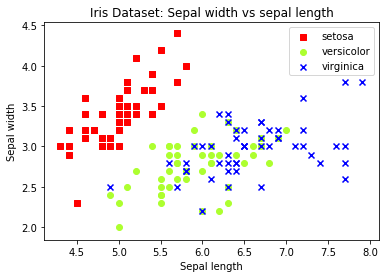

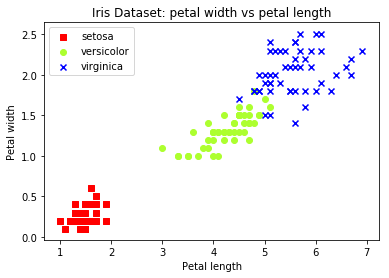

In [8]:
plt.figure('sepal')
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
for i in range(len(colormarkers)):
    px = X_iris[:, 0][y_iris == i]
    py = X_iris[:, 1][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: Sepal width vs sepal length')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.figure('petal')

for i in range(len(colormarkers)):
    px = X_iris[:, 2][y_iris == i]
    py = X_iris[:, 3][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: petal width vs petal length')
plt.legend(iris.target_names)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


## Supervised Learning: Classification

In 1936 Sir Ronald Fisher introduced the Iris dataset to the statistics world, using it to develop a _linear discriminant model_. What he did was to build a linear combination of the attributes that separates a species from the rest, that is, find a straight line similar to the one we suggested in the previous section.

Our first task will be to predict the specie of an Iris flower given the four sepal and length measures. For the moment, we will start using only two attributes, its sepal width and length. We will do this to ease visualization, but later we will use the four attributes, and see if performance improves. This is an instance of a **classification problem**, where we want to assign a label taken from a discrete set to an item according to its features.

The typical classification process roughly involves the following steps: 
- select your attributes, 
- build a model based on available data, and 
- evaluate your model’s performance on previously unseen data. 

To do this, before building our model we should separate training and testing data. Training data will be used to build the model, and testing data will be used to evaluate its performance.


### Separate training and testing sets

Our first step will be to separate the dataset into to separate sets, using 75% of the instances for training our classifier, and the remaining 25% for evaluating it (and, in this case, taking only two features, sepal width and length). We will also perform _feature scaling_: for each feature, calculate the average, subtract the mean value from the feature value, and divide the result by their standard deviation. After scaling, each feature will have a zero average, with a standard deviation of one. This standardization of values (which does not change their distribution, as you could verify by plotting the X values before and after scaling) is a common requirement of machine learning methods, to avoid that features with large values may weight too much on the final results.

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Create dataset with only the first two attributes
X, y = X_iris[:, [0,1]], y_iris
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
    
# Standarize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/marcelo/anaconda3/envs/sk/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Check that, after scaling, the mean is 0 and the standard deviation is 1 (this should be exact in the training set, but only approximated in the testing set, because we used the training set media and standard deviation):

In [11]:
print ('Training set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_train),np.std(X_train)))
print ('Testing set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_test),np.std(X_test)))

Training set mean:0.00 and standard deviation:1.00
Testing set mean:0.13 and standard deviation:0.71


Display the training data, after scaling.

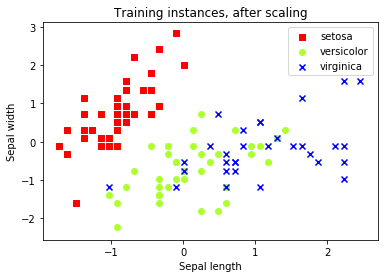

In [13]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
plt.figure('Training Data')
for i in range(len(colormarkers)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Training instances, after scaling')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### A linear, binary classifier

To start, let's transform the problem to a binary classification task: we will only want to distinguish setosa flowers from the rest (it seems easy, according to the plot). To do this, we will just collapse all non-setosa targets into the same clas (later we will come back to the three-class original problem)

In [14]:
import copy 
y_train_setosa = copy.copy(y_train) 
# Every 1 and 2 classes in the training set will became just 1
y_train_setosa[y_train_setosa > 0]=1
y_test_setosa = copy.copy(y_test)
y_test_setosa[y_test_setosa > 0]=1

print ('New training target classes:\n{0}'.format(y_train_setosa))

New training target classes:
[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0]


Our first classifier will be a linear one. 

Linear classification models have been very well studied through many years, and the are a lot of different methods with actually very different approaches for building the separating hyperplane.  We will use the `SGDClassifier` from scikit-learn to implement a linear model, including regularization.  The classifier (actually, a family of classifiers, as we will see) receives its name from using Stochastic Gradient Descent, a very effective numerical procedure to find the local minimum of a function. 

Gradient Descent was introduced by Louis Augustin Cauchy in 1847, to solve a system of linear equations. The idea is based on the observation that a multivariable function decreases fastest in the direction of its negative gradient (you can think of the gradient as a generalization of the derivative for several dimensions). If we want to find its minimum (at least a local one) we could move in the direction of its negative gradient. This is exactly what gradient descent does.


Every classifier in scikit-learn is created the same way: calling a method with the classifier's configurable hyperparameters to create an instance of the classifier. In this case, we will use `linear_model.SGDClassifier`, telling scikit-learn to use a _log_ loss function. 

In [170]:
from sklearn import linear_model 
clf = linear_model.SGDClassifier(loss='log', random_state=42)
print (clf)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)


Note that the classifier includes several parameteres. Usually, scikit-learn specifies default values for every parameter. But be aware that it is not a good idea to keep it with their default values. Later (or in future notebooks, I do not know yet), we will talk about _model selection_, the process of selecting the best parameters.

Now, we just call the `fit` method to train the classifier (i.e., build a model we will later use), based on the available training data. In our case, the trainig setosa set.


In [171]:
clf.fit(X_train, y_train_setosa)

    

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

How does our model look? Well, since we are building a linear classifier, our model is a... line. We can show its coefficients:

In [172]:
print (clf.coef_,clf.intercept_)


[[ 30.97129662 -17.82969037]] [ 17.34844577]


... and we can draw the decision boundary using pyplot:

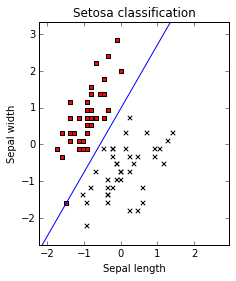

In [173]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig,axes = plt.subplots()
axes.set_aspect('equal')
axes.set_title('Setosa classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')
axes.set_xlim(x_min, x_max)
axes.set_ylim(y_min, y_max)
plt.sca(axes)
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c='red', marker='s')
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c='black', marker='x')
ys = (-clf.intercept_[0]- xs * clf.coef_[0, 0]) / clf.coef_[0, 1]
plt.plot(xs, ys, hold=True)
plt.show()

The blue line is our decision boundary. Every time $30.97 \times sepal\_length - 17.82 \times sepal\_width - 17.34$ is greater than zero we will have an iris setosa (class 0). 

### Prediction

Now, the really useful part: when we have a new flower, we just have to get its petal width and length and call the `predict` method of the classifier on the new instance. _This works the same way no matter the classifier we are using or the method we used to build it_

In [174]:
print ('If the flower has 4.7 petal width and 3.1 petal length is a {}'.format(
        iris.target_names[clf.predict(scaler.transform([[4.7, 3.1]]))]))

If the flower has 4.7 petal width and 3.1 petal length is a ['setosa']


Note that we first scaled the new instance, then applyied the `predict` method, and used the result to lookup into the iris target names arrays. 

### Back to the original three-class problem

Now, do the training using the three original classes. Using scikit-learn this is simple: we do exactly the same procedure, using the original three target classes:

In [175]:
clf2 = linear_model.SGDClassifier(loss='log', random_state=33)
clf2.fit(X_train, y_train) 
print (len(clf2.coef_))

3


We have know _three_ decision curves... scikit-learn has simply converted the problem into three one-versus-all binary classifiers. Note that Class 0 is linearly separable, while Class 1 and Class 2 are not

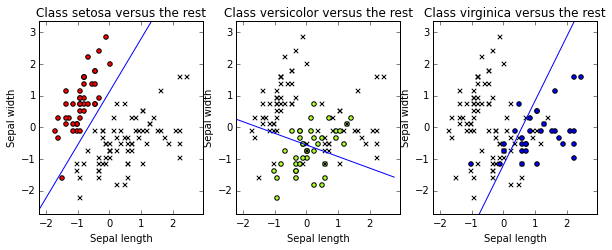

In [176]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ iris.target_names[i] + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    ys=(-clf2.intercept_[i]-xs*clf2.coef_[i,0])/clf2.coef_[i,1]
    plt.plot(xs,ys,hold=True)    
    for j in [0,1,2]:
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        color = colormarkers[j][0] if j==i else 'black'
        marker = 'o' if j==i else 'x'
        plt.scatter(px, py, c=color, marker=marker)     

plt.show()


Let us evaluate on the previous instance to find the three-class prediction. Scikit-learn tries the three classifiers. 

In [177]:
scaler.transform([[4.7, 3.1]])
print(clf2.decision_function(scaler.transform([[4.7, 3.1]])))
clf2.predict(scaler.transform([[4.7, 3.1]]))


[[ 15.45793755  -1.60852842 -37.65225636]]


array([0])

The `decision_function` method tell us the classifier scores (in our case, the left side of the decision boundary inequality). In our example, the first classifier says the flower is a setosa (we have a score greater than zero), and it is not a versicolor nor a virginica. Easy. What if we had two positive values? In our case, the greatest score will be the point which is further away from the decision line. 

### Evaluating the classifier

The performance of an estimator is a measure of its effectiveness. The most obvious performance measure is called _accuracy_: given a classifier and a set of instances, it simply measures the proportion of instances correctly classified by the classifier. We can, for example, use the instances in the training set and calculate the accuracy of our classifier when predicting their target classes. Scikit-learn includes a `metrics` module that implements this (and many others) performance metric.

In [178]:
from sklearn import metrics
y_train_pred = clf2.predict(X_train)
print ('Accuracy on the training set:{:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))


Accuracy on the training set:0.83


This means that our classifier correctly predicts 83\% of the instances in the training set. But this is actually a bad idea.  The problem with the evaluating on the training set is that you have built your model using this data, and it is possible that your model adjusts actually very well to them, but performs poorly in previously unseen data (which is its ultimate purpose). This phenomenon is called overfitting, and you will see it once and again while you read this book. If you measure on your training data, you will never detect overfitting. So, _never ever_ measure on your training data. 

Remember we separated a portion of the training set? Now it is time to use it: since it was not used for training, we expect it to give us and idead of how well our classifier performs on previously unseen data.

In [179]:
y_pred = clf2.predict(X_test)
print ('Accuracy on the training set:{:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))


Accuracy on the training set:0.68


Generally, accuracy on the testing set is lower than the accuracy on the training set, since the model is actually modeling the training set, not the testing set.

One of the problems with accuracy is that does not reflect well how our model performs on each different target class. For example, we know that our classifier works very well identifying setosa species, but will probably fail when separating the other two species. If we could measure this, we could get hints for improving performance, changing the method or the features. 

A very useful tool when facing multi-class problems is the confusion matrix. This matrix includes, in row i and column _j_ the number of instances of class _i_ that were predicted to be in class _j_. A good classifier will accumulate the values on the confusion matrix diagonal, where correctly classified instances belong. Having the original and predicted classes, we can easily print the confusion matrix:

In [180]:
print (metrics.confusion_matrix(y_test, y_pred))


[[ 8  0  0]
 [ 0  3  8]
 [ 0  4 15]]


To read the classification matrix, just remember the definition: the “8” on row 2, column 3, means that eight instances if class 1 where predicted to be in class 2. Our classifier is never wrong in our evaluation set when it classifies class zero (setosa) flowers.  However, when it faces classes one and two (versicolor and virginica), it confuses them. The confusion matrix gives us useful information to know what kind of errors the classifier is making.

Accuracy on the test set is a good performance measure when the number of instances of each class is similar, i.e., we have a uniform distribution of classes. However, consider that 99 percent of your instances belong to just one class (you have a skewed): a classifier that always predicts this  majority class will have an excellent performance in terms of accuracy, despite the fact that it is an extremely naive method (and that it will surely fail in the “difficult” 1% cases).

Within scikit-learn, there are several evaluation functions; we will show three popular ones: precision, recall, and F1-score (or f-measure).

In [181]:
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.43      0.27      0.33        11
  virginica       0.65      0.79      0.71        19

avg / total       0.66      0.68      0.66        38



- Precision computes the proportion of instances predicted as positives that were correctly evaluated (it measures how right is our classifier when it says that an instance is positive).
- Recall counts the proportion of positive instances that were correctly evaluated (measuring how right our classifier is when faced with a positive instance).
- F1-score is the harmonic mean of precision and recall, and tries to combine both in a single number.

### Using the four flower attributes

To end with this classification section, we will repeat the whole process, this time using the four original attributes, and check if performance improves.

In [182]:
# Test set will be the 25% taken randomly
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_iris, y_iris, test_size=0.25, random_state=33)
    
# Standarize the features
scaler = preprocessing.StandardScaler().fit(X_train4)
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

# Build the classifier
clf3 = linear_model.SGDClassifier(loss='log', random_state=33)
clf3.fit(X_train4, y_train4) 

# Evaluate the classifier on the evaluation set
y_pred4 = clf3.predict(X_test4)
print (metrics.classification_report(y_test4, y_pred4, target_names=iris.target_names))


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.78      0.64      0.70        11
  virginica       0.81      0.89      0.85        19

avg / total       0.84      0.84      0.84        38



## Unsupervised Learning: Clustering

Sometimes, is possible to take an unlabeled training set and try to find a hidden structure or patterns in the data: there is no given target class to predict or to evaluate the resulting model. We call these class of machine learning tasks _unsupervised learning_. For instance, _clustering_ methods try to group instances into subsets (called clusters): an instance should be similar to another in the same subset and different from those belonging to another subset.

In this section, we will perform clustering of the Iris data set, to see if we could group instances using their petal and sepal width and length. The trainig set is the same we used we used for our last example on supervised classification.


K-means is probably the most popular clustering algorithm, because it is very simple and easy to implement, and it has shown good performance on different tasks. It belongs to the class of partition algorithms that simultaneously partition data points into distinct groups, called clusters. We will apply k-means to the training data, using only sepal dimensions, building 3 clusters (note that we could have selected a different number of cluster to group data into)

In [183]:
from sklearn import cluster
clf_sepal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_sepal.fit(X_train4[:,0:2])


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=33, tol=0.0001,
    verbose=0)

We can show the label assigned for each instance (note that this label is a cluster name, it has nothing to do with our original target classes... actually, when you are doing clustering you have no target class!).

In [184]:
print (clf_sepal.labels_)

[1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 2 1 2 1 0 0 1 1 0 0 2 0 1 2 2 1 1 0 0 2 1 0
 1 1 2 1 0 2 0 1 0 2 2 0 2 1 0 0 1 0 0 0 2 1 0 1 0 1 0 1 2 1 1 1 0 1 0 2 1
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 1 2 1 2 0 2 0 0 0 1 1 2 1 1 1 2
 0]


Using NumPy's indexing capabilities, we can display the actual target classes for each cluster, just to compare the built clusters with our flower type classes...

In [185]:
print (y_train4[clf_sepal.labels_==0])

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [186]:
print (y_train4[clf_sepal.labels_==1])

[1 1 1 1 1 1 2 1 0 2 1 2 2 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 1 2 1 1 2 1]


In [187]:
print (y_train4[clf_sepal.labels_==2])

[2 2 1 2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2]


As usually, is a good idea to display our instances and the clusters they belong to, to have a first approximation to how well our algorithm is behaving on our data: 

In [188]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
step = .01 
margin = .1   
sl_min, sl_max = X_train4[:, 0].min()-margin, X_train4[:, 0].max() + margin
sw_min, sw_max = X_train4[:, 1].min()-margin, X_train4[:, 1].max() + margin
sl, sw  = np.meshgrid(
    np.arange(sl_min, sl_max, step),
np.arange(sw_min, sw_max, step)
    )
Zs = clf_sepal.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape)
centroids_s = clf_sepal.cluster_centers_


Display the data points and the calculated regions

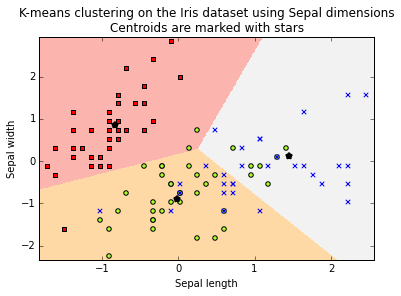

In [189]:
plt.figure(1)
plt.clf()
plt.imshow(Zs, interpolation='nearest', extent=(sl.min(), sl.max(), sw.min(), sw.max()), cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
for j in [0,1,2]:
    px = X_train4[:, 0][y_train == j]
    py = X_train4[:, 1][y_train == j]
    plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
plt.scatter(centroids_s[:, 0], centroids_s[:, 1],marker='*',linewidths=3, color='black', zorder=10)
plt.title('K-means clustering on the Iris dataset using Sepal dimensions\nCentroids are marked with stars')
plt.xlim(sl_min, sl_max)
plt.ylim(sw_min, sw_max)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

Repeat the experiment, using petal dimensions

In [190]:
clf_petal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_petal.fit(X_train4[:,2:4])


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=33, tol=0.0001,
    verbose=0)

In [191]:
print (y_train4[clf_petal.labels_==0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [192]:
print (y_train4[clf_petal.labels_==1])

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1]


In [193]:
print (y_train4[clf_petal.labels_==2])

[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2]


Plot the clusters 

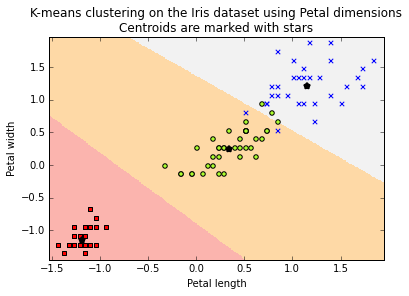

In [196]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
step = .01 
margin = .1
sl_min, sl_max = X_train4[:, 2].min()-margin, X_train4[:, 2].max() + margin
sw_min, sw_max = X_train4[:, 3].min()-margin, X_train4[:, 3].max() + margin
sl, sw  = np.meshgrid(
    np.arange(sl_min, sl_max, step),
    np.arange(sw_min, sw_max, step), 
    )
Zs = clf_petal.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape)
centroids_s = clf_petal.cluster_centers_
plt.figure(1)
plt.clf()
plt.imshow(Zs, interpolation='nearest', extent=(sl.min(), sl.max(), sw.min(), sw.max()), cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
for j in [0,1,2]:
    px = X_train4[:, 2][y_train4 == j]
    py = X_train4[:, 3][y_train4 == j]
    plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
plt.scatter(centroids_s[:, 0], centroids_s[:, 1],marker='*',linewidths=3, color='black', zorder=10)
plt.title('K-means clustering on the Iris dataset using Petal dimensions\nCentroids are marked with stars')
plt.xlim(sl_min, sl_max)
plt.ylim(sw_min, sw_max)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

Now, calculate the clusters, using the four attributes

In [197]:
clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf.fit(X_train4)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=33, tol=0.0001,
    verbose=0)

In [198]:
print (y_train[clf.labels_==0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [199]:
print (y_train[clf.labels_==1])

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1]


In [200]:
print (y_train[clf.labels_==2])

[2 2 1 2 2 1 2 2 1 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2]


Measure precision & recall in the testing set, using all attributes, and using only petal measures

In [201]:
y_pred=clf.predict(X_test4)
print (metrics.classification_report(y_test, y_pred, target_names=['setosa','versicolor','virginica']))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.64      0.64      0.64        11
  virginica       0.79      0.79      0.79        19

avg / total       0.79      0.79      0.79        38



In [202]:
y_pred_petal=clf_petal.predict(X_test4[:,2:4])
print (metrics.classification_report(y_test, y_pred_petal, target_names=['setosa','versicolor','virginica']))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.85      1.00      0.92        11
  virginica       1.00      0.89      0.94        19

avg / total       0.96      0.95      0.95        38



Wait, every performance measure is better using just two attributes. It is possible that less features give better results?  Although at a first glance this seems contradictory, we will see in future notebooks that selecting the right subset of features, a process called feature selection, could actually improve the performance of our algorithms.

## Supervised Learning: Regression

In every example we have seen so far the output we aimed at predicting belonged to a discrete set. For classification, the set was the target class, while for the clustering algorithm the set included different calculated clusters. What if we want to predict a value extracted from the real line?. In this case, we are trying to solve a regression problem. 

To show how regression works in scikit-learn, we will apply to a (very) simple and well-know problem: trying to predict the price of a house given some of its. As the dataset, we will use the Boston house-prices dataset (find the dataset description and attributes [here](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [203]:
from sklearn.datasets import load_boston
boston = load_boston()
print ('Boston dataset shape:{}'.format(boston.data.shape))


Boston dataset shape:(506, 13)


In [204]:
print (boston.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Create training and testing sets, and scale values, as usual

In [206]:
X_train_boston=boston.data
y_train_boston=boston.target
X_train_boston = preprocessing.StandardScaler().fit_transform(X_train_boston)
y_train_boston = preprocessing.StandardScaler().fit_transform(y_train_boston)


Create a method for training and evaluating a model. This time, to evaluate our model we will a different approach: instead of separating the training set, we will use _cross-validation_. 

Cross-validation usually involves the following steps:
1.	Partition the dataset into k different subsets.
2.	Create k different models by training on k-1 subsets and testing on the remaining one.
3.	Measure the performance of each of the k models and use the average value as you performance value.


In [207]:
def train_and_evaluate(clf, X_train, y_train, folds):
    clf.fit(X_train, y_train)
    print ('Score on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    #create a k-fold cross validation iterator of k=5 folds
    cv = sklearn.cross_validation.KFold(X_train.shape[0], folds, shuffle=True, random_state=33)
    scores = sklearn.cross_validation.cross_val_score(clf, X_train, y_train, cv=cv)
    print ('Average score using {}-fold crossvalidation:{:.2f}'.format(folds,np.mean(scores)))


One of the main advantages of cross-validation is reducing the variance of the evaluation measures. Note that when you have a training and testing set, you result will depend on how you created them. Evaluation within machine learning generally assumes that the distribution of classes on your training and testing sets are similar. If this is not the case, you may get results that are not an accurate measure of the actual classifier’s performance. Cross-validation allows us to mitigate this risk: since we are averaging on k different models built on k different datasets, we are reducing variance and probably producing more realistic performance scores for our models. 

Scikit-learn includes a linear model method called `linear_model.SGDRegressor` , which tries  to minimize least squares loss using stochastic gradient descent. We will use it to find the model for Boston house values, and predict a new house value, given its 13 learning features. 

In [208]:
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None, random_state=33)
train_and_evaluate(clf_sgd, X_train_boston, y_train_boston,5)


Score on training set: 0.73
Average score using 5-fold crossvalidation:0.70


If you remember the classification, we used accuracy, the proportion of correctly classified instances in the evaluation set, to summarize in just one number our method’s performance. For regression, accuracy is not a good idea, since we are predicting real values, and it is almost impossible that we may exactly predict the final real value. For regression, the default score function in scikit-learn is the coefficient of determination (or $R^2$ score), which measures the proportion of outcome variation explained by the model.; $R^2$ score ranges from 0 to 1, and reaches its maximum value of 1 when the model perfectly predicts all the target values. 

Let us show the the model  hyperplane coefficients

In [209]:
print(clf_sgd.coef_)

[-0.06777406  0.06767528 -0.04290825  0.08828856 -0.11797833  0.3394894
 -0.01969258 -0.23195707  0.09594823 -0.05271866 -0.19913907  0.10355794
 -0.36852382]


You probably noted the `penalty=None` parameter when we called the method. The penalization parameter for linear regression methods is introduced to avoid overfitting. It does this by penalizing those hyperplanes having some of their coefficients too large, seeking hyperplanes where each feature contributes more or less the same to the predicted value. This parameter is generally the L2 norm (the squared sums of the coefficients) or the L1 norm (the sum of the absolute value of the coefficients). Let us see how our model works if we introduce a L2 penalty:

In [210]:
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', random_state=33)
train_and_evaluate(clf_sgd1, X_train_boston, y_train_boston,folds=5)

Score on training set: 0.73
Average score using 5-fold crossvalidation:0.70


## Summary

To end with this introductory notebook, we will summarize the main common steps to apply a supervised learning method in scikit-learn:
-	Get your dataset. Select your learning features, and create a 2D data array, with one column for each feature, and one row for each learning instance. Every feature is represented by a real number. Your data probably does not look like that in its original format. In the real world, this the preprocessing stage usually takes a lot of time. In the next chapters we will show several examples of preprocessing different types of data. 
-	Create an instance of an estimator (a classifier or a regressor). In scikit-learn, this corresponds to an object that implements the methods `fit(X,y)` and `predict(T)`. This estimator takes as arguments the model’s parameters. You can set these parameters by hand, or using tools for model selection (we will address this later in this book).
-	Separate you training and testing sets (or, alternatively, use cross-validation)
-	Build the model using the `fit(X,y)` method, being X your training data, and y the corresponding target class. 
-	Evaluate you estimator on the testing data, using the `predict(T)` method, being T your testing dataset.
-	Compare your results with the original target classes, using one of the several measures in the metrics module.

The previous steps are only an overview: scikit-learn offers several additional methods implementing different machine learning operations (such as dimensionality reduction, clustering, or semi-supervised learning), and many dataset transformation methods. 
